In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

newFrame=pd.read_csv('CodonTable.csv')

Frame=newFrame.iloc[:,4:].copy()
# 
# 
Frame = Frame.replace('NA', np.nan, regex=True)                    
                         
Frame =Frame.fillna(0)
Frame=Frame.apply(pd.to_numeric)
Frame['Brain_mRNA'].head(5)

In [22]:
CodonFrame=Frame.iloc[:,-(64 + 29):]
CodonFrame
OnlyCodonFrame=Frame.iloc[:,-64:]
PTRFrame = Frame.iloc[:,-(64 + 29):-64]
OnlyCodonFrame

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.000,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.410,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.002933,0.014663,0.000000,0.005865,0.029326,0.017595,0.002933,0.035191,0.029326,0.026393
6,4.513,4.434,4.461,4.536,4.917,4.677,4.164,4.275,4.202,5.513,...,0.000000,0.023766,0.000000,0.014625,0.038391,0.012797,0.000000,0.014625,0.010969,0.023766
7,4.559,5.015,5.120,4.426,5.285,4.640,4.015,4.460,4.823,4.719,...,0.005944,0.005944,0.001486,0.011887,0.022288,0.002972,0.001486,0.032689,0.008915,0.008915
8,5.110,0.000,0.000,0.000,5.008,0.000,0.000,0.000,5.180,5.263,...,0.002500,0.010000,0.000000,0.002500,0.020000,0.002500,0.022500,0.017500,0.012500,0.032500
9,5.227,0.000,4.165,4.115,0.000,4.801,5.671,3.805,4.962,5.573,...,0.002347,0.018779,0.002347,0.002347,0.014085,0.004695,0.025822,0.018779,0.018779,0.028169


,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.006048,0.018145,0.016129,0.004032,0.010081,0.030242,0.016129,0.006048,0.000000,0.030242,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.042017,0.011765,0.020168,0.028571,0.015126,0.030252,0.001681,0.015126,0.020168,0.008403,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,0.023051,0.020339,0.037288,0.023051,0.024407,0.021017,0.004746,0.018305,0.004746,0.015593,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.019244,0.020619,0.034364,0.020619,0.017182,0.023368,0.006186,0.022680,0.006186,0.016495,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,0.008475,0.033898,0.031073,0.002825,0.005650,0.025424,0.019774,0.008475,0.002825,0.011299,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650
5,0.014663,0.035191,0.017595,0.014663,0.017595,0.011730,0.000000,0.008798,0.014663,0.020528,...,0.002933,0.014663,0.000000,0.005865,0.029326,0.017595,0.002933,0.035191,0.029326,0.026393
6,0.007313,0.012797,0.018282,0.012797,0.018282,0.021938,0.005484,0.016453,0.003656,0.023766,...,0.000000,0.023766,0.000000,0.014625,0.038391,0.012797,0.000000,0.014625,0.010969,0.023766
7,0.023774,0.031204,0.037147,0.007429,0.004458,0.017831,0.010401,0.007429,0.004458,0.016345,...,0.005944,0.005944,0.001486,0.011887,0.022288,0.002972,0.001486,0.032689,0.008915,0.008915
8,0.037500,0.025000,0.017500,0.027500,0.007500,0.015000,0.002500,0.017500,0.032500,0.002500,...,0.002500,0.010000,0.000000,0.002500,0.020000,0.002500,0.022500,0.017500,0.012500,0.032500
9,0.032864,0.023474,0.025822,0.025822,0.007042,0.011737,0.002347,0.021127,0.023474,0.014085,...,0.002347,0.018779,0.002347,0.002347,0.014085,0.004695,0.025822,0.018779,0.018779,0.028169


In [16]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('50_Startups.csv')
X = CodonFrame.drop('Liver_PTR',axis=1)
y = Frame['Liver_PTR']


# np.nan_to_num(X)
# #Convert the column into categorical columns

# states=pd.get_dummies(X['State'],drop_first=True)

# # Drop the state coulmn
# X=X.drop('State',axis=1)

# # concat the dummy variables
# X=pd.concat([X,states],axis=1)



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.6176071363174127


In [6]:
X_test['AAC']

1585     0.014331
9105     0.010438
2916     0.018810
1516     0.028409
9113     0.021359
8902     0.018667
2495     0.003650
4209     0.014493
2869     0.007207
5927     0.024357
6939     0.013223
2506     0.009091
4219     0.019694
3270     0.023290
651      0.018576
5176     0.027282
10295    0.013728
8435     0.018832
2709     0.021442
2238     0.010204
1085     0.026882
11407    0.013557
1570     0.028302
3358     0.014742
8268     0.029940
930      0.012092
5386     0.018919
8571     0.016563
477      0.038202
2158     0.000000
           ...   
593      0.012121
7093     0.016304
2585     0.014599
2330     0.010088
7761     0.027559
693      0.006186
7346     0.017182
7227     0.033419
6141     0.019417
7766     0.025078
7049     0.018565
7512     0.027559
9365     0.014778
9788     0.029536
10067    0.023923
5460     0.000000
551      0.035789
8815     0.024570
10241    0.012712
2217     0.007711
10363    0.044444
8198     0.037975
2049     0.006993
9118     0.034137
11013    0

[Text(0, 0.5, 'Liver PTR'), Text(0.5, 0, 'AAC Frequency')]

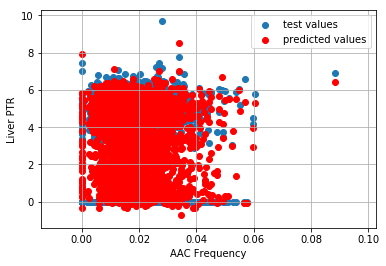

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_test['AAC'], y_test, label='test values') 
ax.scatter(X_test['AAC'], y_pred , color='red', label='predicted values') 
ax.set(xlabel='AAC Frequency', ylabel='Liver PTR')
# title='Real value and prediction of Liver PTR for regression accounting all PTR values' 
ax.grid()
ax.legend()
fig.savefig("Liver_PTRvsAACLinRegALL.png", dpi=400)
plt.show()
# plot(X_test.iloc[1,:], y_test) 

In [10]:
y_pred

array([5.77545984, 4.93800913, 4.38742267, ..., 3.57032742, 0.64608329,
       5.61760966])

In [29]:
df= pd.DataFrame(columns=CodonFrame.columns[:29])

df

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,Rectum_PTR,Salivarygland_PTR,Smallintestine_PTR,Smoothmuscle_PTR,Spleen_PTR,Stomach_PTR,Testis_PTR,Thyroid_PTR,Tonsil_PTR,Urinarybladder_PTR


In [103]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
score_list=[]
coef_list=[]
for i in range(29):

    # Importing the dataset
    # dataset = pd.read_csv('50_Startups.csv')
    y = CodonFrame[CodonFrame.columns[i]]
    X = CodonFrame.drop(CodonFrame.columns[i],axis=1)
#     X = CodonFrame.iloc[:,-64:]
    y.head(5)
    X.head(5)


    # np.nan_to_num(X)
    # #Convert the column into categorical columns

    # states=pd.get_dummies(X['State'],drop_first=True)

    # # Drop the state coulmn
    # X=X.drop('State',axis=1)

    # # concat the dummy variables
    # X=pd.concat([X,states],axis=1)



    # Splitting the dataset into the Training set and Test set

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    # Fitting Multiple Linear Regression to the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    coefficient=regressor.coef_[:]
    coefficient=np.insert(coefficient,i,0)  # insert "3" within "b"
    score=r2_score(y_test,y_pred)
    score_list.append(score)
    coef_list.append(coefficient)
    print(regressor.coef_)

0    0.000
1    0.000
2    6.290
3    0.000
4    3.843
Name: Adrenal_PTR, dtype: float64

,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 2.39072116e-02  1.53965932e-01  6.07965642e-03 -7.82812342e-03
  4.94940952e-02 -1.05604633e-02  1.07096861e-02  5.71734617e-02
  6.57743294e-03  5.85677614e-02  2.32634953e-03  3.48049441e-02
  5.49905838e-02  6.19389702e-02  6.23054370e-02  4.71512225e-02
  2.84638436e-02  7.23175130e-02 -2.07933058e-03  5.25937193e-02
 -7.23302512e-04  6.29514198e-02  5.80026246e-02  7.79425287e-02
  4.21397901e-02  1.98340856e-02 -4.38483405e-02  7.25434073e-04
  2.13285385e+00 -1.10927379e+00 -1.51531742e-01 -5.77044835e+00
 -5.49839453e-01  1.07463148e+00 -3.54818674e+00  7.43108524e-01
 -1.20943729e-01 -3.86037776e+00 -5.15801191e+00  2.22400198e+00
 -5.14922173e-01 -9.87172445e-01 -1.54430131e+00 -5.56439015e+00
 -2.03806687e+00  3.07159220e+00 -1.00034868e+00 -3.79195260e+00
 -4.39838095e-01 -3.63928383e+00  7.57000329e-01  2.55853868e-01
 -3.88195594e-01  2.43888556e+00  2.74971230e+00 -6.69009912e+00
 -1.18113562e+01 -2.30629486e+00  8.70102629e-02  6.36447273e+00
 -1.83284886e+00 -2.22963

0    8.277
1    0.000
2    6.328
3    0.000
4    4.601
Name: Appendices_PTR, dtype: float64

,Adrenal_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 2.53358699e-02  1.14529181e-02  6.50709302e-02  4.01837537e-03
  8.62438534e-03  3.54578403e-02 -3.11846182e-02  1.63266817e-01
  1.46051981e-02 -1.47499208e-02 -7.32811006e-03 -2.36837206e-02
  4.56810348e-02  1.29644508e-01  5.60450850e-03  4.03491737e-02
  2.46039591e-02  5.98621924e-04  6.33681001e-02 -2.89333945e-03
  6.17516699e-02  1.68025041e-02  1.57124888e-01  6.03964001e-02
 -5.60789112e-03 -3.72686411e-02  5.59197518e-02  1.23074942e-01
  1.05540267e+00  3.58305623e+00  1.40524202e+00  3.25736484e+00
  4.07194101e+00  3.27194141e+00  8.94803093e+00  1.02323369e+00
 -3.07555454e-01  6.79788747e-01  2.11532969e+00 -3.89529845e+00
  2.47326609e+00  1.06935112e-01  2.45029999e+00 -2.94572757e+00
  2.63364602e+00 -3.29708511e+00  1.70504926e-01  2.88134544e+00
  4.50085406e-01 -6.12797187e-01 -3.47001112e+00  1.81298846e+00
  5.82906619e+00  3.40614684e+00 -4.77637248e+00  3.40630160e+00
 -3.94927456e+00  3.14024795e+00 -7.96037476e-02  1.62903490e-01
  8.05559173e-01  1.17951

0    0.000
1    0.000
2    5.948
3    3.995
4    0.000
Name: Brain_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.811,6.068,5.383,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,0.000,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 2.38421395e-01  1.67351593e-02 -1.48550128e-02 -1.53146086e-02
  5.68451883e-02  2.03489475e-02 -1.07162928e-02 -3.27482454e-03
 -4.22072640e-02  1.22840643e-01  3.66313733e-02  2.46382358e-02
 -3.18274323e-02  1.00445009e-02  5.01071480e-02  2.50036325e-02
 -3.33260081e-02  2.69801821e-02 -9.05913294e-03  3.24995061e-02
 -3.33182772e-02  4.69247779e-02  3.52837479e-02  1.32031431e-02
  7.96418301e-02  1.43668872e-01  3.37861731e-03 -1.68459699e-02
 -4.30810601e+00 -5.27053099e+00  6.64677429e-01 -5.36539241e-01
  2.84834033e+00 -3.63402801e+00  3.73544685e+00 -1.00304734e+00
 -7.67615478e+00  7.84046508e-01 -5.24413895e+00  2.22326670e+00
 -6.73409772e+00  9.25557773e+00  4.28960258e-01  4.48993053e+00
 -8.47807329e+00 -5.00515265e+00 -1.34145673e+00  2.56475966e+00
  4.31061538e-01 -4.07301202e+00 -1.35973516e+00 -4.30234337e+00
  4.50000246e+00 -1.29859423e+00  5.66621414e+00  8.60130453e+00
 -4.70349414e+00 -4.52469485e+00 -4.64318472e+00 -1.90825672e+00
  6.30073137e-01  3.46590

0    0.000
1    5.135
2    5.811
3    0.000
4    0.000
Name: Colon_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.371,0.000,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,6.068,5.383,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 5.37501054e-03  5.42850702e-02 -8.48111054e-03  1.06587200e-01
  9.48421904e-03  5.12412794e-02  5.67088792e-02  2.21056042e-02
  3.76689772e-02 -3.31948845e-02  4.54569426e-02  6.00364257e-03
  2.18696067e-02  2.13483844e-02 -4.59332538e-03 -1.42500958e-03
 -2.72938374e-03 -1.79433193e-02  2.67547373e-01  7.56075921e-03
  1.11328362e-01  2.29518452e-02  7.54009208e-03  1.28920406e-01
 -8.81951753e-03  2.39300400e-02  6.35517917e-02  1.03944046e-02
  3.61235651e+00  1.31942969e+00 -1.10082658e-01 -9.98535842e-01
  4.53307734e-01  1.54222856e+00 -1.21129227e+00  1.71447901e+00
  1.06071824e+00  2.68348780e-01  3.32723803e+00  4.97856471e+00
  1.23755055e+00  2.06599652e+00 -2.17456493e+00  5.89413680e-01
  2.94352840e+00  3.30269006e+00 -1.02839750e+00  2.64763367e-01
  3.54736284e-01  7.11119641e-01 -1.34401161e+00  5.04843598e-01
  5.20421698e+00  3.63781033e+00 -2.55686497e-01 -5.72452272e-01
 -2.08138840e-03  2.67779052e+00  2.22998052e-01 -6.67956524e-01
 -8.66730495e-01  2.34089

0    0.000
1    5.371
2    6.068
3    0.000
4    0.000
Name: Duodenum_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,0.000,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,5.383,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-6.03489518e-03  2.92318078e-03 -7.62425440e-03  9.29430322e-02
  2.76918574e-02  3.52073466e-02 -1.95242388e-02 -2.26031721e-03
  4.70382160e-02  1.92454077e-02 -6.91065323e-03  3.53224370e-02
  2.33079664e-02  2.19778099e-02  3.26279105e-03 -2.20515639e-04
  2.79595956e-03  5.32880715e-02  8.93285301e-02  7.41283364e-03
  4.32188884e-01 -1.04816575e-02  8.28074022e-03  1.11161647e-01
  2.88300387e-02 -3.80409081e-02  4.38800785e-03  6.62375364e-03
 -1.14705748e+00 -7.32257491e-01 -1.10139864e+00  1.77941794e-01
 -2.67551866e+00 -6.94348587e-02  1.37615143e-01  1.60908335e+00
  5.64913141e-01 -9.28807785e-01 -3.05314562e+00  5.05014339e-01
 -3.35055386e+00 -2.13448605e+00  5.75282766e-01 -1.22297956e+00
 -1.42985222e+00 -3.14669275e+00 -5.80542177e-01 -2.53072997e+00
  8.02036707e-01  1.63021048e+00 -3.14852090e+00 -2.84726789e+00
 -1.03707739e+00  4.99325322e-01  1.18708681e+00 -1.13793579e+00
  3.15151996e+00 -9.65533888e-02  5.74701815e-02  5.92788236e-01
  5.68758267e-01  2.44289

0    0.000
1    0.000
2    5.383
3    0.000
4    0.000
Name: Endometrium_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.881,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,4.129,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,4.013,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 4.13062015e-02  6.79177246e-03  3.06362066e-02  8.95288823e-03
  2.99779472e-02  9.76882065e-02  1.24990965e-01 -1.39991614e-02
  3.37056759e-02  4.53048224e-02  1.21481172e-02 -2.89378902e-02
  6.95532819e-02  2.66179609e-02  9.27432268e-02  2.78414149e-03
  2.66621942e-02  7.37552484e-02  5.37558879e-02 -1.82907169e-02
 -9.23845221e-03  2.07114592e-01 -5.12848716e-03  5.00940948e-03
  6.29637622e-02  3.86508192e-02 -3.32715343e-02  3.78795852e-02
  1.04933373e-01 -4.56641565e-01  1.55995817e+00 -4.08786527e-01
  1.57241839e+00  1.20952311e+00  2.65191504e+00  8.80910508e-01
 -2.49650292e-01 -1.94258428e+00  5.35097217e-02  4.05703946e+00
 -2.95806803e+00 -4.59850576e-01 -1.04254779e+00  1.24332913e+00
  1.21404257e+00  3.43370179e+00  1.57992897e+00  4.15394013e-01
  7.44864997e-01  1.76129010e+00  4.60581958e+00 -1.10115291e+00
  5.28168644e+00  6.96685602e-01  1.01613522e+00  2.53765477e+00
 -5.60729673e-01 -1.14298318e+00  3.50601142e-02 -2.25042477e+00
  2.72375508e+00 -1.54507

0    0.000
1    0.000
2    5.881
3    4.129
4    4.013
Name: Esophagus_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,7.841,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,6.119,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,3.683,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-9.83912922e-03  3.11730343e-02  1.22432031e-02  5.39999520e-02
  4.25495451e-02  1.09057103e-01  1.40466996e-02  4.52451070e-02
  7.97888665e-02  5.90306284e-02  2.04228663e-02 -1.45341680e-02
  1.40604847e-02 -1.18918881e-02  3.76104224e-02 -1.41976762e-02
  2.61330539e-02  3.63299550e-02  6.10150853e-02  3.68701393e-02
 -2.74017693e-02  9.92117686e-02  5.61082075e-03  1.15020580e-02
  1.55494995e-02  2.13085501e-02  7.45674061e-02  1.69679450e-01
 -3.00407953e-01  4.43664162e-02  9.36748819e-01  1.87805185e+00
 -2.78631857e-02  2.27741339e+00  3.65851524e-01 -7.99249846e-01
  2.16547750e+00  1.22962901e-03 -4.46316707e+00 -1.34463457e+00
 -9.89220745e-01 -9.19096468e-02 -1.04003449e+00  2.66219575e+00
  2.61634372e+00  1.76355281e+00  1.93700146e+00 -3.17709069e+00
  2.58380364e-01  1.15082681e+00 -2.17298269e+00 -4.10378005e-01
  1.15770351e+00 -2.10150648e+00 -1.40447692e+00  6.64371900e-01
  4.10176386e-01 -1.06085756e+00  8.60454946e-01 -1.41227330e+00
  7.00621431e-01  2.33676

0    7.841
1    0.000
2    6.119
3    0.000
4    3.683
Name: Fallopiantube_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fat_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.00,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.41,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.00,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,0.00,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 1.18068049e-02 -3.24406226e-02 -7.62921099e-03  7.07141662e-02
 -2.79201461e-02  1.65109627e-01  1.66209655e-02 -1.96420759e-02
  1.51625118e-02  1.77729875e-03  6.47807420e-02  1.43402699e-03
  1.50455235e-01  2.83641087e-02  5.56535990e-02  3.37762372e-02
  1.24600002e-02  3.82085306e-02 -2.93502411e-02  6.88864840e-02
 -2.00862578e-03  6.73967360e-02  4.63342298e-03  5.60220493e-02
  6.78907328e-02  9.35729999e-02  2.95898622e-02 -2.51349954e-02
  2.32753278e+00  4.52616982e-01  1.68147594e+00 -2.79170807e+00
  2.62350349e+00 -1.02789152e+00  2.43412220e+00 -3.75730504e-01
  3.36905026e+00 -1.18108207e+00  5.23453528e+00 -2.28857972e+00
  7.41168507e-01 -1.47325467e+00 -7.45530265e-01 -2.83850163e+00
  1.75332197e+00  2.92469925e+00  6.86242297e-01  2.99907594e+00
 -2.60952164e+00  9.38709100e-01  1.81059860e+00  2.97660879e+00
 -1.56242347e+00  3.87229195e+00  5.61052569e+00 -4.21846576e+00
  5.28950406e+00 -9.67086091e-03 -1.53053797e+00  2.30587883e+00
 -8.42045300e-02 -4.15696

0    0.00
1    0.00
2    6.41
3    0.00
4    0.00
Name: Fat_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Gallbladder_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.000,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,5.425,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,5.828,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.000,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.000,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.20485387e-02  1.67196854e-01 -2.29511534e-03  2.71355842e-02
 -3.18195764e-03 -1.82044356e-02  5.27029587e-02 -1.93360967e-02
  6.54364412e-02  7.34018473e-02  1.05507514e-02  9.44413854e-02
  5.16871271e-02  7.40690928e-02  7.36290979e-02  4.52266380e-02
  7.04882314e-02  3.79193605e-02 -1.13988479e-02  1.35648844e-02
 -5.66533489e-02  5.07920637e-02  9.19501315e-02 -1.50498928e-02
  2.70498064e-02  8.11422461e-03 -2.81053878e-02  7.01491944e-02
 -5.46141872e+00  1.12972261e+00 -9.03957463e-01 -1.71954920e+00
 -6.49524502e-01  7.17763497e-01 -3.17403802e+00  2.83012701e+00
  2.19956687e+00 -1.32128247e+00  3.46155223e-01  7.22016039e-01
  6.24978499e-01  1.08986800e+00  1.28562197e-02  2.91866461e+00
  1.16284342e+00 -9.49607494e-01 -1.14042215e+00 -4.08526427e+00
 -1.56443189e+00  1.24229790e+00 -5.89095998e-01 -4.96656937e+00
 -9.38793785e+00 -4.69614451e+00 -3.32987619e+00 -2.80341056e+00
 -3.50145340e+00  9.57896464e-01  1.90040988e-01  3.86642703e+00
  3.98022967e-01 -2.66336

0    0.000
1    5.425
2    5.828
3    0.000
4    0.000
Name: Gallbladder_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Heart_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,0.000,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.108,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.44297532e-03  1.34999014e-02 -2.66991018e-02  4.17362653e-02
  5.97680125e-02  3.95613597e-02  8.38877686e-02  1.34724179e-02
  5.90626110e-02  2.62496883e-02  3.04350683e-02  2.70038750e-02
  4.69392192e-02 -1.88547020e-02  5.29392814e-02  6.91533224e-02
  2.31971832e-02  4.55002812e-02  1.08768662e-01 -5.47923124e-04
  4.95905297e-03  3.15716986e-02  3.02153190e-02  8.16069730e-02
  2.02018582e-02 -3.85000738e-02 -3.41489132e-02  1.90583119e-01
  1.10444681e+00 -2.51187340e+00 -1.12630709e+00  5.65619182e+00
  5.71342642e-01  3.62379699e+00  4.76981926e+00  4.80880556e-02
  1.94799853e+00  2.24456155e+00  1.11905540e+00 -1.15417867e+00
  4.90262094e+00  1.09557871e+00 -1.12080963e+00 -2.68696960e-01
  2.84603681e+00  2.14235033e+00 -2.70770645e-01  2.90936862e-02
 -4.43484883e-01  1.02222548e+00  7.27518653e-02  2.27895663e+00
  3.15361691e-01  3.94117815e-01 -2.37689973e+00  2.24091529e-01
  7.33621198e+00  6.41346547e-01  9.55735692e-01 -2.84242120e+00
 -4.22729550e-01  2.70589

0    0.000
1    0.000
2    5.108
3    0.000
4    0.000
Name: Heart_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 7.33152909e-02 -1.74228313e-02  9.93018702e-02 -4.70009695e-02
  3.12500694e-02  6.79545436e-02  7.93121370e-02  2.01809092e-03
  8.46653792e-02  3.35451741e-02  4.35953351e-02  3.01975234e-02
 -4.66829778e-03  2.46628509e-02  6.28820571e-02  4.80112582e-02
  4.31183988e-02  2.79700783e-02  3.83979356e-02  5.75782387e-02
 -2.18882723e-02  9.42285417e-02  3.12956091e-02 -7.25644389e-03
  7.87224550e-02  7.63563134e-02 -4.77023426e-02  1.76505756e-02
 -2.22063247e+00  4.20039989e-01 -1.40609128e+00 -4.56878443e-01
  2.64558445e+00 -1.28258602e-01 -4.12453151e+00 -1.62610352e+00
  1.01678480e+00 -1.87776910e+00  4.16408868e+00 -3.30659681e+00
  3.19524363e+00  8.39826176e-01  1.70609418e+00 -4.31188470e+00
 -6.95997952e+00  5.40889191e-02 -1.07330541e+00  2.72318385e+00
 -9.38703076e-01 -5.59047062e-01 -1.56707798e+00  3.81945876e+00
  1.27433561e-01  1.05132827e+00 -1.75407034e+00  1.03650581e+01
  1.83239577e+00 -2.04016644e+00  4.99400438e-01 -2.61874885e+00
  1.24947560e+00 -1.45194

0    0.000
1    5.659
2    5.482
3    0.000
4    4.535
Name: Kidney_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 2.98897657e-03 -8.88449265e-03  3.03934609e-02  6.60613558e-02
 -1.15174034e-02  1.87022840e-02  2.81637542e-02  7.54984122e-02
  1.24909039e-02  3.99201152e-02  4.47457330e-02  1.89364181e-01
 -2.69102821e-02 -1.05018024e-02 -1.66667658e-02  7.66092778e-02
 -6.56464676e-04  4.51792332e-02  6.83363336e-02  3.64487854e-02
  3.98380368e-02  5.81125324e-02  1.38277405e-02  4.47385717e-02
  1.80407516e-02  1.53157449e-01 -2.82455344e-02  1.01103937e-02
 -6.53670041e-01  1.14897122e+00  1.45185656e+00  7.07079169e-01
  9.82794313e-04 -6.78220281e-01 -4.78683749e+00 -1.03568469e+00
  3.63806797e+00 -4.11321149e+00 -1.94748058e+00 -3.24315784e+00
 -2.55481856e+00  2.15996708e+00  7.08737573e-02  2.86531749e+00
 -2.95011819e+00 -2.47096713e+00  3.54205226e-01  5.64637942e-02
 -6.20540120e-01 -1.94544154e-01  3.59697421e-01 -1.77319709e+00
 -4.16996667e+00 -4.26109535e+00 -2.23238331e+00  1.31265503e+00
 -3.59962549e+00  7.40306493e-01 -1.65531962e+00  1.81600328e+00
  1.25975811e+00 -4.11203

0    4.931
1    5.531
2    4.877
3    0.000
4    0.000
Name: Liver_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 4.55133106e-02 -2.92240580e-02  2.08058999e-02  8.87998090e-03
  5.99150711e-02 -4.53421889e-02 -2.03992393e-02  1.70097985e-03
  1.13794892e-01  3.60490261e-02  3.15451703e-02  1.92729314e-01
 -1.70188410e-02  2.72922708e-02  5.18113876e-02  3.76709571e-02
  2.38664731e-02 -8.81885901e-03 -4.63659767e-02  7.79569164e-02
  1.54752226e-01  2.67500029e-02  5.12325356e-02 -4.85516703e-02
  1.62181506e-02  8.74095502e-02  9.00232427e-02 -2.01483410e-02
  2.08730269e+00 -4.91584527e+00  1.16900757e+00 -4.16323716e+00
  1.93396678e+00 -1.10222012e+00  2.23834867e+00 -5.65081798e+00
 -4.05183616e+00 -1.46712336e+00  2.46826696e+00  1.63102491e+00
  2.31346781e+00 -3.96538212e+00  2.43628220e+00 -2.58281834e+00
 -4.23816003e+00  7.99413786e-01 -1.38645209e+00  1.77942743e+00
 -2.25848006e+00 -2.57841420e+00 -3.06014447e+00  2.37662847e-01
 -3.52816267e+00 -2.61256371e+00  1.18531728e+00 -4.09327895e+00
  4.90475250e+00 -2.84391537e-01  2.67470342e+00  1.67117926e+00
 -1.20455941e+00 -1.42118

0    7.544
1    0.000
2    4.959
3    0.000
4    4.846
Name: Lung_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 4.94601868e-02  3.87700589e-02 -1.84862336e-02  2.22488778e-02
  2.71931638e-02  7.49588956e-02  1.35735679e-02  1.22749316e-01
  4.28363784e-02  4.30996004e-02 -3.35420835e-03 -1.88381447e-02
 -1.17057681e-02  3.16242815e-02  2.52206469e-02 -9.79211770e-03
  9.02549282e-02  5.83113486e-03 -3.75970255e-02  2.98282807e-02
  8.19299441e-02 -2.99344999e-02  5.88985185e-02  3.78832753e-02
 -4.77875002e-03  6.82616691e-02  9.42933151e-02  1.00415325e-01
  2.38360414e+00 -2.07904959e+00  4.82192188e-01 -3.16017366e+00
 -1.37161157e+00 -2.32388396e+00 -6.08249206e+00  2.41990294e+00
  1.33916644e+00  3.15116733e+00  5.37858642e+00  1.28398942e+00
  3.00003131e-01 -1.51614327e+00 -1.63805946e+00 -4.67757400e+00
 -5.18689026e+00  4.01503928e+00  1.79717053e+00  7.79507881e+00
 -1.93286301e-01 -8.11834301e-01 -3.80499922e-01 -2.15237419e-02
  4.78587794e+00 -5.65561933e-01  6.47371767e+00 -2.32248268e+00
  4.80392767e-01 -8.66692529e-01 -6.93615622e-01  3.70865429e-01
 -6.30015880e-01 -2.11109

0    7.713
1    0.000
2    6.126
3    0.000
4    0.000
Name: Lymphnode_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.00322916e-02  1.18568185e-01  6.28678655e-03  2.34037619e-02
  2.76307891e-02  3.09124804e-02 -1.23708079e-02  2.49364392e-02
  6.61486366e-02 -1.86556582e-02  1.90953790e-02 -7.92204384e-03
  2.02284742e-02  3.40780070e-02  8.58550492e-02 -2.79072956e-02
  4.62741236e-03 -3.74916754e-02 -1.21427564e-02  4.33594277e-02
  2.10978825e-02  3.21361526e-02  1.98546273e-01  2.89252036e-02
  3.22624819e-02  3.10107722e-02  2.29252325e-01  1.28787362e-02
 -1.02555941e+00  2.50791161e+00 -2.73777056e+00 -7.33724719e-01
  1.44552136e+00 -4.25324958e-01 -5.24922815e+00  9.80287342e-01
 -6.79400376e-01 -1.26725600e+00 -1.14933773e+00 -1.47606355e-01
 -4.02902534e+00  5.13320554e-02  9.07574271e-01 -5.24506393e-01
 -7.37424813e-01 -3.93466924e-01  6.15966497e-01 -1.81678378e+00
 -1.25233907e+00  6.10903157e-02  2.87335310e+00  9.51282224e-01
 -2.68483029e+00 -1.93902795e+00 -2.61060095e+00  3.95220572e-01
  6.87378941e-01 -3.31406761e+00 -1.11779264e+00 -2.02340699e+00
 -2.98219252e-01 -2.28319

0    0.000
1    0.000
2    6.243
3    0.000
4    0.000
Name: Ovary_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.93898816e-02  5.88980393e-03  3.60370552e-02 -5.78624911e-03
  4.71354215e-03  1.23762916e-01  4.49577656e-02  5.62221967e-02
  7.55583752e-02  6.01891489e-02  5.59449645e-02 -1.44468775e-02
  4.41263430e-02  3.12290663e-02  9.86540912e-02  4.83613944e-02
  4.05549977e-02  5.50320191e-02  4.96965055e-02  2.33373833e-02
 -7.36089187e-03  3.60240671e-02  2.70231749e-02 -3.04875901e-02
  8.94194318e-02  9.53329844e-03 -4.31529221e-03 -4.08296118e-03
  1.77952348e+00  1.62234144e+00  2.78118360e+00  4.02654973e+00
 -1.06873137e+00  1.63170262e+00  1.07495229e+00  1.59384667e+00
 -1.54195869e+00  4.73479607e+00 -1.35470638e+00  1.48868633e-01
  2.42434780e+00  2.09512401e+00  1.30991056e+00  4.06155188e+00
  2.48487989e+00  1.99270969e+00  2.26723592e+00 -3.76966183e-01
  3.87001752e+00 -8.52257294e-01  4.97855347e+00  5.65609689e+00
  3.18430470e+00  2.87994755e+00  1.83617751e+00 -6.35818087e+00
  6.06205887e+00  1.73525954e+00  1.86469951e+00  1.70962328e+00
  4.11720355e+00  2.09051

0    0.00
1    6.00
2    5.55
3    0.00
4    0.00
Name: Pancreas_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.39838687e-02  5.16660535e-02  2.19108919e-02 -2.18723295e-03
 -3.88154716e-04  4.52696328e-03 -2.06785992e-02  4.15750864e-02
  5.65502820e-02  9.57989061e-02  5.20456802e-02  8.09117069e-02
  3.90918935e-02 -1.47736138e-02 -3.90727835e-02  5.89258903e-02
  1.74176900e-02  4.45298509e-02  3.85318740e-02  1.32710222e-01
  5.32506776e-02 -1.86001331e-02  5.38890554e-03  9.45508898e-02
  3.05299077e-02  6.50916938e-02 -2.56993885e-02  2.28567585e-02
  5.43712112e+00 -1.80433522e-01  2.87657247e+00 -2.01289211e+00
 -6.10096260e-01 -3.24557262e-02  2.40814945e+00  1.87393874e+00
 -3.17609839e-01  6.52666443e-01  1.79038309e+00 -1.85826931e+00
 -3.48864436e+00  5.11492060e+00  3.52340231e+00  2.50830085e+00
  2.99723906e+00 -6.06213888e+00  2.21950759e+00 -3.65414690e-01
  2.24176192e+00  4.02874783e+00 -8.18734682e-01 -1.54500228e-01
  4.16170119e+00  5.64011020e+00  2.96798978e+00  3.28790074e+00
 -2.30837023e+00  8.54636297e-01  1.28815082e+00 -1.61412939e+00
  1.97054436e+00  2.72992

0    0.000
1    0.000
2    5.903
3    0.000
4    2.537
Name: Placenta_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 3.23859679e-02  2.64156583e-02 -2.44864622e-02 -3.51259155e-03
  4.12650290e-03  3.63494090e-02  3.19138947e-02  1.28595490e-02
  7.38997348e-02  2.69444020e-02  3.91913319e-02 -5.81335913e-04
  2.07660595e-02  1.14173901e-01  5.43226061e-03  4.14321544e-02
  1.46041523e-02  3.19714217e-02 -3.50422170e-03  6.89683229e-02
  4.30267592e-02  4.14535943e-02  1.02054050e-01 -8.32808453e-03
  5.18140897e-02  4.73159464e-02  5.18160813e-02  9.58706629e-02
 -2.09767496e+00  2.65357341e+00 -2.99075430e+00 -1.06935999e+00
  2.67751926e+00 -4.10192435e+00  7.61659550e+00 -2.33541313e+00
 -7.32308795e+00  3.54807558e+00 -2.87951155e+00  9.53314957e-01
 -2.63131542e+00 -2.02233897e-01 -1.46631552e+00 -1.17717725e+00
  6.71915337e-01 -2.64760758e+00 -3.07979127e+00  3.60129764e-02
 -3.38458925e+00 -1.63461640e+00 -3.19107024e+00 -1.48083487e+00
  7.73955626e-03 -2.07853683e+00 -3.44605187e+00  9.45080681e+00
 -2.01233959e-02  4.40087946e+00 -3.20827475e-01  7.43398810e-01
 -2.87292098e+00  4.92941

0    0.00
1    0.00
2    5.68
3    0.00
4    0.00
Name: Prostate_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 7.49055231e-02  5.85081117e-04  1.80465690e-02 -2.10219433e-02
  7.15959235e-02  9.15379998e-02  4.03888536e-02  3.58983965e-02
  3.61904759e-02  4.81121096e-02  2.31434502e-02  3.64218222e-02
 -6.98530335e-03  6.71515470e-03 -4.00667637e-02  5.11818060e-02
  3.39894440e-02  2.91050917e-02  4.98334986e-02  1.37626056e-01
 -1.87281863e-02  9.31703841e-02 -1.44062594e-03  6.87688494e-02
  4.71594491e-02  2.67771845e-02 -2.44057776e-03  6.98189237e-02
  6.14619640e-01  3.70966066e+00 -8.24627562e-01  5.19261283e-01
  3.24101614e+00  3.75435786e-01 -1.48145793e+00  2.98939847e+00
  3.04282131e-01 -4.64224566e-01  1.99907581e+00  2.02018995e+00
 -2.41831002e+00  2.52748527e-01  2.24903154e+00  2.48576549e+00
  5.09996031e+00  4.54574504e-01  1.95700068e+00  4.85368136e+00
  1.49162386e+00  1.14392719e+00  2.13892546e+00 -2.21944212e-01
  3.58503766e+00 -2.64469528e+00 -1.97785217e+00  5.84241452e+00
  2.81490195e+00  2.84719090e+00  2.33011843e+00 -2.41994549e+00
 -8.16088768e-01  4.38825

0    0.000
1    5.147
2    6.081
3    0.000
4    4.731
Name: Rectum_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-1.87737838e-03  5.39873563e-02 -5.28195034e-03  2.73230186e-01
  1.04617994e-01  5.81557204e-02  5.91278109e-02 -2.40372233e-02
 -9.48313991e-03  1.00254071e-01  2.76949260e-02  4.80211327e-02
 -3.20132816e-02 -3.77410810e-02 -1.13116149e-02  4.02887619e-02
  2.56372160e-02 -2.78071518e-03  4.34389470e-02  3.45230539e-02
  2.34804310e-02  8.97564869e-02 -9.24282656e-03  8.44834961e-02
  1.45670060e-02  1.77124614e-02  1.45856895e-02  1.41537915e-02
 -2.91864962e+00 -4.83884307e-02  2.05185582e+00  5.37769630e-01
  6.10200208e+00  8.09608507e-01 -3.29439493e+00  1.21243020e+00
 -9.34264440e-01  1.93231044e+00 -2.55970894e+00 -4.32513789e+00
  8.69479183e-01  4.58785885e-01  9.33729809e-01  3.24063312e+00
 -2.44488699e+00 -4.20375969e+00 -5.27371586e-01 -2.42537115e+00
  1.37497518e+00  8.59102833e-02  2.43662775e+00 -1.54735360e+00
 -7.45476252e-01 -2.12906651e-01 -8.42039541e-01 -2.84146536e+00
  2.87604608e+00  3.69286234e-01 -1.05517677e+00  4.70597528e+00
  1.60209518e+00 -8.63775

0    7.718
1    0.000
2    5.726
3    0.000
4    4.508
Name: Salivarygland_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 5.60731208e-02 -2.91080651e-03  2.23757199e-02  9.11771405e-03
  1.02516325e-02 -2.33662867e-02  4.21912051e-02  6.66191701e-02
  1.33260019e-02 -5.96362647e-04  4.90391894e-02  3.02451930e-02
  6.35591395e-02  3.53575076e-02  4.76961631e-02  2.23410100e-02
  1.04267192e-01  6.46259847e-02  1.41661276e-01  4.07663454e-02
  5.59440952e-02 -2.07918058e-02  2.76424823e-02  6.15867381e-02
 -3.47269675e-02  6.70614328e-02  4.58058100e-02  1.49596871e-02
  3.64808997e-01 -1.81680187e+00 -2.14339046e+00 -2.53936454e+00
 -3.45297801e+00 -2.15264201e+00 -6.78712852e+00 -5.30471107e+00
 -1.03693113e+00 -2.41279494e+00 -1.05568357e-01 -2.28152575e+00
  1.96059220e-01 -2.23792985e+00  1.00288187e+00 -1.33505038e+00
 -8.52549179e+00 -8.01250542e-01 -5.85457359e-01 -1.11962725e+00
  7.44847752e-01 -4.75993340e+00 -7.14654035e-01 -9.08805112e-01
  3.54300344e-02 -2.50681305e+00 -1.13152990e-01 -6.43449647e+00
 -1.78681240e+00 -4.11096775e-01 -1.10170502e+00 -1.61190380e+00
 -4.84257732e+00 -2.83539

0    0.000
1    5.202
2    5.699
3    0.000
4    0.000
Name: Smallintestine_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-5.78747949e-04  4.66241904e-02 -1.72159677e-02  1.00756954e-01
  4.48570819e-01 -8.85741184e-03 -2.35328434e-02 -1.45785013e-03
 -4.17693781e-02  4.05077573e-03 -1.39908802e-02  2.48096065e-02
  9.46910450e-02  7.28861027e-02  1.74175642e-02 -5.28846616e-03
  3.13990922e-02  3.02583186e-02 -1.44675454e-02  2.08088120e-02
  4.19858454e-02  4.97582882e-03  2.26813190e-02  1.14771969e-01
 -6.29123111e-03  4.43461254e-03  1.33014407e-02 -5.95010434e-03
 -2.06993435e-01 -6.43334359e-01  1.66988944e-01 -9.88447348e-01
  3.89035325e-01 -2.14766166e+00  9.03832377e-01 -1.24959307e+00
 -2.40948552e+00 -1.87044470e+00  5.13512507e-01  1.43304646e+00
 -1.46517080e+00 -8.37329430e-01 -1.09033027e+00 -6.55933633e-02
  1.89874500e+00 -9.98451446e-01 -5.18377203e-01  1.49385329e-01
 -2.45613534e+00  1.37783643e+00  3.38520851e+00  5.07832276e-01
  2.42680608e+00  2.81058571e-01  2.51839941e+00  7.25643617e+00
 -5.65606603e+00 -3.89300012e-01  3.39632929e-02 -1.33834047e+00
  1.96082104e-01 -3.49907

0    0.000
1    0.000
2    4.997
3    0.000
4    0.000
Name: Smoothmuscle_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 5.58522546e-02  1.40670261e-02  2.68854195e-02  2.30331058e-02
 -1.20629375e-02  2.20183113e-01  9.44766923e-02  5.42398400e-02
  4.15235016e-02  2.85958552e-02  6.67854279e-02  4.01289169e-02
  1.81493688e-02 -2.95283898e-02  2.94176597e-02  2.86984026e-02
 -1.21611233e-02  3.23246653e-02  7.98073164e-02  8.82008471e-02
 -1.73024079e-02  5.51735743e-03  1.66280934e-02  4.77050577e-02
  1.08849132e-02  1.11903410e-02  1.56556513e-02  5.62310736e-02
  5.68222826e-01  9.36157583e-01 -9.23868344e-01  5.01678391e-01
 -2.61135161e+00 -2.78201410e+00  2.77450850e+00  5.53628507e-01
  9.08162422e-01  2.42388980e+00 -1.82611548e+00 -1.99539406e+00
  1.48996183e+00 -4.52661004e-01  2.38341789e-01 -6.05674224e-01
  2.42273278e+00  1.32496113e+00 -1.73190336e-01 -1.36213219e+00
 -2.39135673e-01 -4.11419149e-01 -6.54356223e-01  1.46553093e-02
  7.21247972e-01  1.33709375e+00  4.94157326e+00 -1.28707219e+00
  1.31058207e+00 -3.56669652e+00 -2.09170150e+00 -7.42234348e+00
 -8.99000691e-01  1.73028

0    7.313
1    0.000
2    5.136
3    0.000
4    0.000
Name: Spleen_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 5.99385684e-02  1.53213420e-01  2.35457670e-02  8.81322964e-03
  1.10998169e-02 -6.35018127e-03  6.22316653e-03  4.34315195e-03
  8.75535995e-02  3.18754163e-02  2.58348647e-02  1.11214751e-02
  4.04862063e-02  6.76699209e-02  2.11689597e-01  2.50740734e-02
  4.10375810e-03  9.26884517e-02 -1.43727407e-03 -1.05787719e-02
  2.67926035e-02  2.92925740e-02  1.93671625e-02 -3.93450270e-03
 -1.65095518e-02  2.60736879e-02  4.69844328e-02  5.33974250e-02
 -1.13560026e+00 -1.08355778e+00 -5.58392177e-01 -5.25647747e-01
  7.99416677e-01 -1.38603557e+00  4.88686448e+00  2.80080606e-01
  3.74790674e+00 -1.58973007e+00 -4.68173817e+00 -1.30438343e+00
  3.58298205e+00  7.89058445e-01 -7.91223262e-01  1.88940814e+00
  1.23615139e+00  6.95687870e-01  1.16346017e+00  7.25289453e-01
 -8.29065397e-01  7.86818530e-01  1.58568260e+00  4.24506909e-01
 -1.65814461e+00  7.60607429e-01 -1.18757551e+00  1.38284015e-01
 -5.99970136e+00  1.94996902e+00  1.99634895e+00 -8.10972422e-01
  2.86964354e+00  6.31925

0    0.0000
1    5.8143
2    6.5349
3    0.0000
4    4.0613
Name: Stomach_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.89282113e-02  5.03995519e-02  7.54013740e-03  1.28956696e-01
  1.27516218e-01  5.30819881e-03  1.09175296e-02  4.49392545e-02
 -1.22636248e-02  7.36749326e-02 -5.12637557e-03  3.07933606e-02
 -3.28344091e-02  3.72479705e-02  2.63923463e-02 -2.42089199e-02
  6.16184257e-02 -6.47298061e-03  5.87143039e-02  8.27496423e-02
  5.10844681e-02  1.26849529e-01  4.75501359e-02 -3.36708162e-03
  1.27780769e-02  1.97265764e-02  6.35244884e-03  1.02068501e-02
 -9.53811241e-02  2.74328157e-01 -2.00639463e+00  3.09553821e+00
 -2.85630068e+00 -1.13600296e+00 -2.89617772e+00 -9.22248738e-01
  2.81534638e-01  1.47911656e+00  1.61716342e+00 -4.09075703e+00
 -5.13378409e-02 -1.75097473e+00 -1.79092964e+00 -1.92024441e+00
 -3.74369010e+00  1.68801749e+00 -1.63297201e+00 -1.79501891e+00
 -2.78423171e-02 -2.22179212e+00 -2.79276755e+00  8.79255715e-01
 -5.63018990e+00 -3.32419750e+00 -2.33524520e+00 -6.86777414e+00
  7.14939454e+00 -1.91775121e+00 -4.22161693e-02 -1.75326972e+00
 -7.39961765e-01 -5.68566

0    0.000
1    0.000
2    5.820
3    2.350
4    4.832
Name: Testis_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 5.65477411e-02 -7.10093556e-03  6.90150069e-02 -1.33865122e-02
  5.01829343e-02  1.01239897e-01  2.23957502e-02  8.26376095e-02
  3.34464466e-02  2.76747797e-02  8.43889504e-02  1.88421291e-02
  1.66428131e-02 -7.12967583e-03  4.46683310e-02  1.07741892e-01
  3.01905375e-02  6.11093171e-02  6.10971929e-02  2.16503500e-02
 -4.37088027e-02 -1.05508887e-02  1.64631405e-02 -2.14387499e-02
  1.93894671e-02  1.99270981e-02  1.64146477e-02 -2.68527359e-02
 -2.57254728e+00  1.97952952e+00  2.35899589e+00  2.21317253e+00
 -8.20590453e+00  7.67360400e-01  1.67421257e+00 -4.56646431e-01
 -7.81778369e-01 -4.00191590e+00 -7.78212271e-01 -1.54696469e+00
  1.83133947e+00  2.00953972e+00  4.50088330e+00  2.11711641e+00
  2.35018828e+00 -2.57609684e+00  1.57636982e+00 -1.28565294e+00
  2.83937262e+00  3.73985156e-01  2.08819858e-01  1.12354876e+00
 -6.92970362e-01  2.43827963e+00 -8.27826757e-01  4.82781121e+00
 -7.45783570e-01 -1.37096592e+00  5.16891901e-01  6.94833134e+00
  3.94068681e+00  4.30003

0    0.00
1    0.00
2    6.06
3    0.00
4    0.00
Name: Thyroid_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 2.35304504e-02 -4.17210011e-02  1.10067766e-01  3.21115449e-02
 -5.85405590e-02  5.49433190e-02  2.71330281e-02  1.00696173e-01
  8.87008973e-03 -4.66282998e-02  7.23647509e-02  1.41419285e-01
  7.93011446e-02  9.00383523e-02  3.79585572e-02  1.01552600e-02
  5.69070524e-02  4.93358088e-02  3.06699176e-02  2.32738753e-02
  7.46225424e-02  6.57512852e-03  1.49632591e-02  2.99337964e-02
  2.64634985e-02  1.76172949e-02  8.95292750e-02 -2.19750497e-02
 -8.30688459e-01 -9.36022061e-01  8.88681852e-01 -9.69747826e-01
 -3.58167916e+00 -1.46611454e+00  1.84926869e+00 -3.67307497e+00
 -1.34341234e+00 -4.24494193e-01 -1.33985241e+00  4.37378151e+00
 -5.90605287e-01 -2.50931082e+00  3.96209625e-02  4.09118662e+00
 -2.50656942e+00 -4.90389511e-02  2.06528335e-01  3.21224039e+00
 -2.39837978e+00  1.56219165e+00 -1.40385401e+00  1.09783947e+00
  7.52225711e+00 -1.96770534e-01  3.70242549e-01 -1.26826139e+00
 -3.11020433e+00  2.59723344e-02 -1.64386600e+00  1.78598208e+00
 -1.13624985e+00  1.45517

0    0.000
1    0.000
2    5.675
3    5.249
4    0.000
Name: Tonsil_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[-4.99608989e-02  6.01222773e-02  2.48596779e-03  8.19039030e-02
  6.48533495e-03 -4.54242788e-02  9.11910941e-02  3.05818941e-02
 -2.95073084e-02 -3.97213436e-02 -4.34191035e-02 -2.50483621e-02
  7.84393972e-02  1.19451213e-01  2.69506901e-01 -4.41486158e-03
 -2.15785537e-02  5.18893598e-02 -2.68472232e-03  1.84066934e-02
  4.89527175e-02  1.89411469e-02  2.01054149e-02  5.18050802e-02
  8.18456763e-03  1.39375280e-02  8.59852766e-02  1.17924982e-01
  6.53454761e-01 -2.70786568e+00  2.44677149e+00 -3.31267718e+00
 -6.81139612e-01 -1.08247057e+00  3.17435081e+00 -1.45645151e+00
 -4.04747447e-01  5.44690730e-01 -3.61425964e+00  4.98361312e+00
 -1.74049598e+00 -5.54796938e-01 -2.65494737e-01 -2.19490625e-01
 -2.20663699e+00 -3.49387208e+00  3.05435169e+00 -1.51151691e+00
  4.49512604e+00 -1.35139955e+00 -2.99453051e+00 -3.27393582e+00
  5.53739532e-01 -5.21027932e+00  2.49981429e-01  2.43256935e+00
 -1.08932680e+00 -2.57138266e+00 -2.24698925e+00  7.77981035e-01
 -3.10298010e+00 -1.61197

0    0.0000
1    0.0000
2    5.8286
3    0.0000
4    4.2430
Name: Urinarybladder_PTR, dtype: float64

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.00,0.000,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.00,5.425,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.41,5.828,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.00,0.000,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.00,0.000,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[ 6.62046136e-04  1.05987110e-01 -9.92809071e-03  1.07297509e-02
  7.84119780e-03  4.14222466e-02  1.66205679e-01 -2.08071918e-02
  5.89896642e-02  1.77559820e-01  1.28680648e-02  7.18142828e-03
 -1.40615149e-02  1.01887963e-01  1.21266993e-02 -3.34576440e-03
  1.53718949e-02  7.68975848e-02  6.15167094e-02  1.43065471e-02
  1.28053653e-02 -6.78649283e-03  5.78404283e-02  4.71576223e-02
  1.05331804e-02 -1.82623202e-02 -1.69044916e-02  9.44537143e-02
  1.10426414e+00 -2.52824470e-01  2.27537788e+00  2.04154144e+00
 -3.24105482e+00  1.18727946e+00 -4.09639285e+00 -7.44847813e-01
 -2.13435392e+00 -1.98040394e-01  3.47143423e-01 -1.98654468e+00
  6.94753862e-01  9.26328219e-01 -2.29631675e+00  9.55761722e-02
  1.07833582e+00  1.88264405e-01 -7.62750265e-02  8.23084276e-01
  2.95534898e-01 -1.29361253e+00  3.60359921e-01  1.17191413e+00
 -2.70641083e+00  1.24376683e+00  2.59706181e+00 -1.87679438e-01
 -1.01172914e+00 -2.79201768e+00  7.43006848e-01  3.02671771e+00
 -1.59767641e-01  1.24532

In [102]:
# coef_list[0].size
# coefficient=coef_list[0]
# coefficient=np.insert(coefficient,0,1)
# coefficient.size
# coefficient

93

94

array([ 1.00000000e+00,  0.00000000e+00,  2.39072116e-02,  1.53965932e-01,
        6.07965642e-03, -7.82812342e-03,  4.94940952e-02, -1.05604633e-02,
        1.07096861e-02,  5.71734617e-02,  6.57743294e-03,  5.85677614e-02,
        2.32634953e-03,  3.48049441e-02,  5.49905838e-02,  6.19389702e-02,
        6.23054370e-02,  4.71512225e-02,  2.84638436e-02,  7.23175130e-02,
       -2.07933058e-03,  5.25937193e-02, -7.23302512e-04,  6.29514198e-02,
        5.80026246e-02,  7.79425287e-02,  4.21397901e-02,  1.98340856e-02,
       -4.38483405e-02,  7.25434073e-04,  2.13285385e+00, -1.10927379e+00,
       -1.51531742e-01, -5.77044835e+00, -5.49839453e-01,  1.07463148e+00,
       -3.54818674e+00,  7.43108524e-01, -1.20943729e-01, -3.86037776e+00,
       -5.15801191e+00,  2.22400198e+00, -5.14922173e-01, -9.87172445e-01,
       -1.54430131e+00, -5.56439015e+00, -2.03806687e+00,  3.07159220e+00,
       -1.00034868e+00, -3.79195260e+00, -4.39838095e-01, -3.63928383e+00,
        7.57000329e-01,  

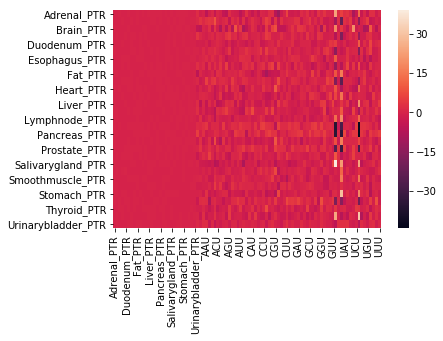

In [108]:
df= pd.DataFrame(columns=Frame.columns[:29])
df=pd.DataFrame([score_list],columns=CodonFrame.columns[:29])
dfCoef=pd.DataFrame(coef_list,columns=CodonFrame.columns)
# dfCoef.rename(index=CodonFrame.columns[:29])
dfCoef.index = CodonFrame.columns[:29]
sns.heatmap(dfCoef)

In [109]:
dfCoef.to_csv('CoefficientsLinearRegression.csv')
df.to_csv('RegressionCoefficientsSimple.csv')

In [ ]:
DataReg=pd.read_csv('RegressionCoefficientsSimple.csv')
DataReg=DataReg.rename(index={0: "R squaredCodon", 1: "R_squaredCodon+28"})
DataReg
# DataReg.iloc[:,0]

In [76]:
( DataReg*100).T

,R_squaredCodon,R_squaredCodon+28
Adrenal_PTR,14.223186,70.904132
Appendices_PTR,11.294783,68.960045
Brain_PTR,12.611846,53.811823
Colon_PTR,11.528379,74.627777
Duodenum_PTR,12.071975,74.804414
Endometrium_PTR,15.172841,72.962994
Esophagus_PTR,13.941856,72.832602
Fallopiantube_PTR,14.656271,64.890491
Fat_PTR,13.314030,68.527429
Gallbladder_PTR,13.416494,73.262956


Text(0.14223186300000001, 0.709041323, 'Adrenal_PTR')

Text(0.11294782699999999, 0.6896004490000001, 'Appendices_PTR')

Text(0.126118456, 0.538118231, 'Brain_PTR')

Text(0.11528379300000001, 0.746277772, 'Colon_PTR')

Text(0.12071975300000001, 0.7480441409999999, 'Duodenum_PTR')

Text(0.151728411, 0.729629943, 'Endometrium_PTR')

Text(0.139418559, 0.7283260220000001, 'Esophagus_PTR')

Text(0.146562713, 0.648904913, 'Fallopiantube_PTR')

Text(0.133140302, 0.685274295, 'Fat_PTR')

Text(0.13416494199999998, 0.732629559, 'Gallbladder_PTR')

Text(0.142565742, 0.641444019, 'Heart_PTR')

Text(0.14083557900000002, 0.643329102, 'Kidney_PTR')

Text(0.147809129, 0.6176071360000001, 'Liver_PTR')

Text(0.126360334, 0.689081004, 'Lung_PTR')

Text(0.136616619, 0.719831951, 'Lymphnode_PTR')

Text(0.137483865, 0.690729413, 'Ovary_PTR')

Text(0.147171819, 0.63172231, 'Pancreas_PTR')

Text(0.12395121699999999, 0.657286535, 'Placenta_PTR')

Text(0.12840101, 0.665547062, 'Prostate_PTR')

Text(0.127063655, 0.7406596059999999, 'Rectum_PTR')

Text(0.139264875, 0.685859509, 'Salivarygland_PTR')

Text(0.12142930099999999, 0.7303589290000001, 'Smallintestine_PTR')

Text(0.138102795, 0.7211263520000001, 'Smoothmuscle_PTR')

Text(0.11456697, 0.6997712340000001, 'Spleen_PTR')

Text(0.11158360199999999, 0.697873697, 'Stomach_PTR')

Text(0.146684615, 0.57232364, 'Testis_PTR')

Text(0.150097649, 0.6712165170000001, 'Thyroid_PTR')

Text(0.14073729999999998, 0.650170048, 'Tonsil_PTR')

Text(0.130936708, 0.73674033, 'Urinarybladder_PTR')

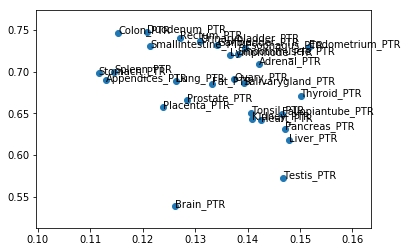

In [69]:


plt.scatter(DataReg.iloc[:,0],DataReg.iloc[:,1])
for sample in DataReg.index:
    plt.annotate(sample, (DataReg.iloc[:,0].loc[sample], DataReg.iloc[:,1].loc[sample]))

In [70]:
DataRegPercent=DataReg*100
DataRegPercent

,0,1
Adrenal_PTR,14.223186,70.904132
Appendices_PTR,11.294783,68.960045
Brain_PTR,12.611846,53.811823
Colon_PTR,11.528379,74.627777
Duodenum_PTR,12.071975,74.804414
Endometrium_PTR,15.172841,72.962994
Esophagus_PTR,13.941856,72.832602
Fallopiantube_PTR,14.656271,64.890491
Fat_PTR,13.314030,68.527429
Gallbladder_PTR,13.416494,73.262956


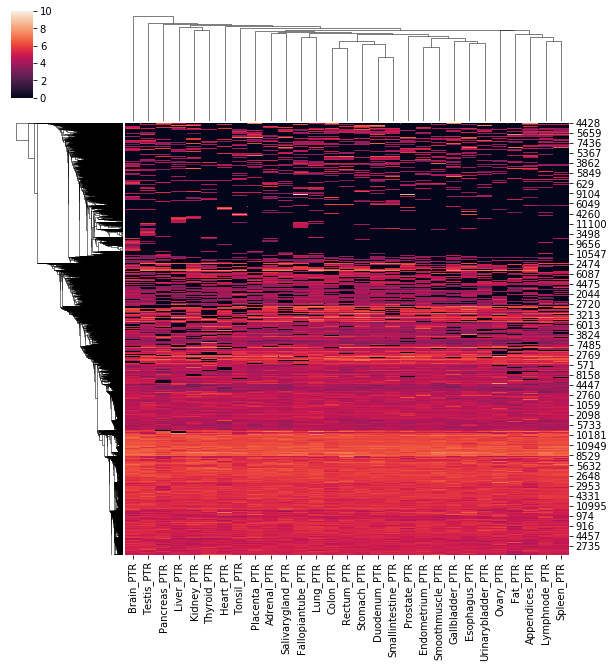

In [36]:
graph = sns.clustermap(PTRFrame)

In [45]:
OnlyCOdonFrame

,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.006048,0.018145,0.016129,0.004032,0.010081,0.030242,0.016129,0.006048,0.000000,0.030242,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.042017,0.011765,0.020168,0.028571,0.015126,0.030252,0.001681,0.015126,0.020168,0.008403,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,0.023051,0.020339,0.037288,0.023051,0.024407,0.021017,0.004746,0.018305,0.004746,0.015593,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.019244,0.020619,0.034364,0.020619,0.017182,0.023368,0.006186,0.022680,0.006186,0.016495,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,0.008475,0.033898,0.031073,0.002825,0.005650,0.025424,0.019774,0.008475,0.002825,0.011299,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650
5,0.014663,0.035191,0.017595,0.014663,0.017595,0.011730,0.000000,0.008798,0.014663,0.020528,...,0.002933,0.014663,0.000000,0.005865,0.029326,0.017595,0.002933,0.035191,0.029326,0.026393
6,0.007313,0.012797,0.018282,0.012797,0.018282,0.021938,0.005484,0.016453,0.003656,0.023766,...,0.000000,0.023766,0.000000,0.014625,0.038391,0.012797,0.000000,0.014625,0.010969,0.023766
7,0.023774,0.031204,0.037147,0.007429,0.004458,0.017831,0.010401,0.007429,0.004458,0.016345,...,0.005944,0.005944,0.001486,0.011887,0.022288,0.002972,0.001486,0.032689,0.008915,0.008915
8,0.037500,0.025000,0.017500,0.027500,0.007500,0.015000,0.002500,0.017500,0.032500,0.002500,...,0.002500,0.010000,0.000000,0.002500,0.020000,0.002500,0.022500,0.017500,0.012500,0.032500
9,0.032864,0.023474,0.025822,0.025822,0.007042,0.011737,0.002347,0.021127,0.023474,0.014085,...,0.002347,0.018779,0.002347,0.002347,0.014085,0.004695,0.025822,0.018779,0.018779,0.028169


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

Text(0.5, 68.99999999999991, '64 codons ')

Text(200.55629139072846, 0.5, '11575 genes clustered by codon frequency')

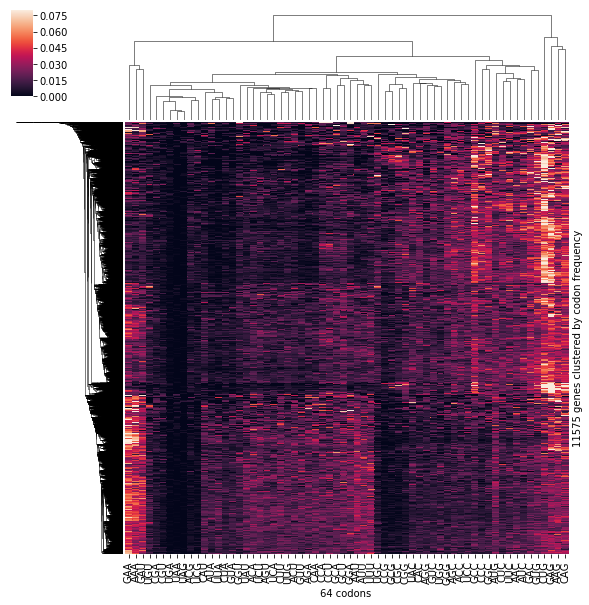

In [59]:
graph2=sns.clustermap(OnlyCOdonFrame, vmin=0, vmax=0.08,yticklabels="", xticklabels=OnlyCOdonFrame.columns)
ax = graph2.ax_heatmap
plt.xticks(rotation=45)
plt.xticks(fontsize=16)
ax.set_xlabel("64 codons ")
ax.set_ylabel("11575 genes clustered by codon frequency")
graph2.savefig('Figures/ClustermapGenes.png', dpi=400, transparent=True, bbox_inches='tight')


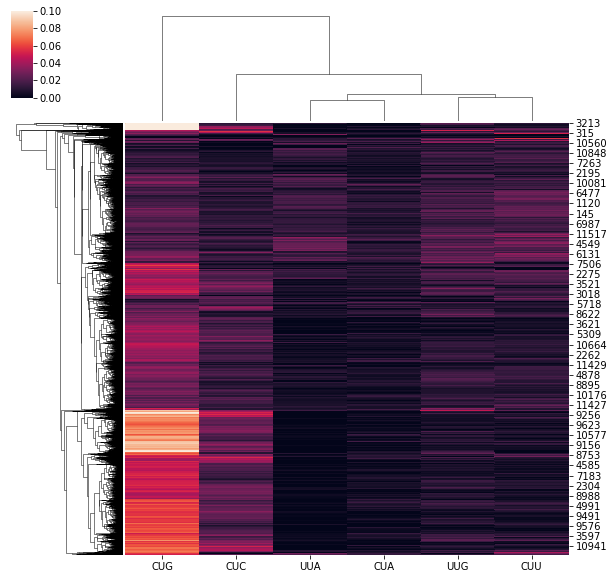

In [40]:
graph2=sns.clustermap(OnlyCOdonFrame[['UUA','UUG','CUU','CUC','CUA','CUG']], vmin=0, vmax=0.10)

In [15]:
PTRFrame.reindex(graph2.dendrogram_row.reordered_ind)
PTRFrame

,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,Rectum_PTR,Salivarygland_PTR,Smallintestine_PTR,Smoothmuscle_PTR,Spleen_PTR,Stomach_PTR,Testis_PTR,Thyroid_PTR,Tonsil_PTR,Urinarybladder_PTR
5472,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,6.101,0.0000
6198,4.156,0.000,6.164,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000
6197,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,2.694,0.000,0.0000
6194,0.000,0.000,4.208,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.938,0.000,0.000,3.2769,0.000,0.000,0.000,0.0000
6195,0.000,4.663,5.271,0.000,0.000,0.000,4.053,0.000,0.000,0.000,...,0.000,0.000,3.782,0.000,0.000,3.9350,0.000,4.217,0.000,5.2108
6196,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.661,0.000,0.000,0.0000,0.000,0.000,0.000,0.0000
4970,0.000,0.000,0.000,0.000,0.000,0.000,5.197,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,5.853,6.4955
9370,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,2.452,0.000,0.000,0.0000
9598,0.000,0.000,0.000,0.000,0.000,0.000,4.906,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,5.092,0.0000
9599,0.000,0.000,0.000,0.000,0.000,0.000,3.681,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000,5.086,0.0000


,Adrenal_PTR,Appendices_PTR,Brain_PTR,Colon_PTR,Duodenum_PTR,Endometrium_PTR,Esophagus_PTR,Fallopiantube_PTR,Fat_PTR,Gallbladder_PTR,...,Rectum_PTR,Salivarygland_PTR,Smallintestine_PTR,Smoothmuscle_PTR,Spleen_PTR,Stomach_PTR,Testis_PTR,Thyroid_PTR,Tonsil_PTR,Urinarybladder_PTR
0,0.000,8.277,0.000,0.000,0.000,0.000,0.000,7.841,0.000,0.000,...,0.000,7.718,0.000,0.000,7.313,0.0000,0.000,0.000,0.000,0.0000
1,0.000,0.000,0.000,5.135,5.371,0.000,0.000,0.000,0.000,5.425,...,5.147,0.000,5.202,0.000,0.000,5.8143,0.000,0.000,0.000,0.0000
2,6.290,6.328,5.948,5.811,6.068,5.383,5.881,6.119,6.410,5.828,...,6.081,5.726,5.699,4.997,5.136,6.5349,5.820,6.060,5.675,5.8286
3,0.000,0.000,3.995,0.000,0.000,0.000,4.129,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0000,2.350,0.000,5.249,0.0000
4,3.843,4.601,0.000,0.000,0.000,0.000,4.013,3.683,0.000,0.000,...,4.731,4.508,0.000,0.000,0.000,4.0613,4.832,0.000,0.000,4.2430
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,4.3992,0.000,0.000,0.000,0.0000
6,4.513,4.434,4.461,4.536,4.917,4.677,4.164,4.275,4.202,5.513,...,4.440,4.350,4.120,4.241,3.975,5.0890,4.991,4.651,4.505,4.4699
7,4.559,5.015,5.120,4.426,5.285,4.640,4.015,4.460,4.823,4.719,...,4.817,4.807,4.395,4.310,0.000,4.7653,4.552,4.588,4.901,4.8409
8,5.110,0.000,0.000,0.000,5.008,0.000,0.000,0.000,5.180,5.263,...,0.000,0.000,5.076,0.000,0.000,4.7098,0.000,0.000,0.000,0.0000
9,5.227,0.000,4.165,4.115,0.000,4.801,5.671,3.805,4.962,5.573,...,4.282,0.000,0.000,0.000,0.000,4.5203,3.657,3.563,0.000,4.2271


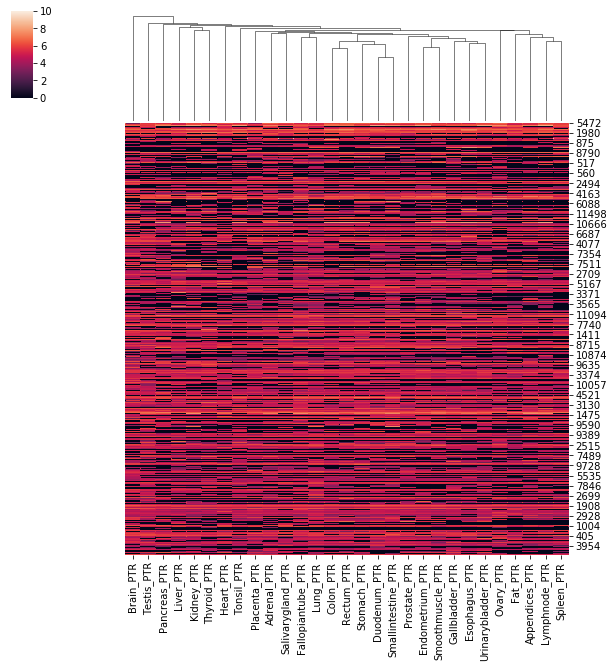

In [19]:
Heat=sns.clustermap(PTRFrame.reindex(graph2.dendrogram_row.reordered_ind), row_cluster=0)

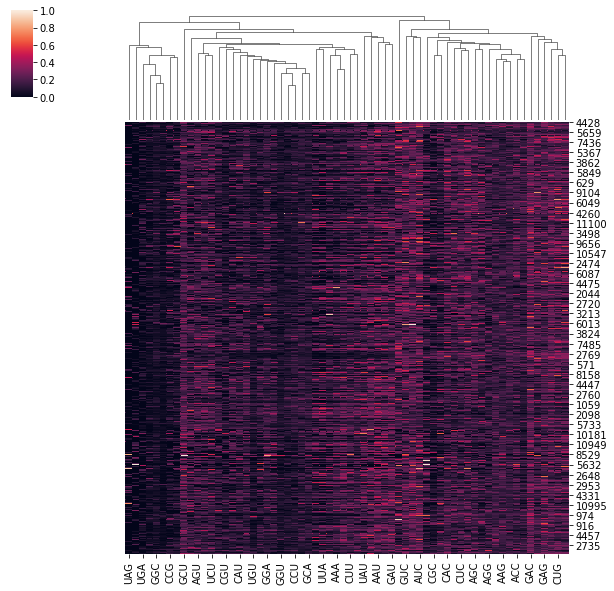

In [24]:
Heat2=sns.clustermap(OnlyCodonFrame.reindex(graph.dendrogram_row.reordered_ind), row_cluster=0, standard_scale=1)